In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle(r'C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\AI-Driven-Tourism-Recommendation-System\Dataset\clean_data1.pkl')

# Check for null value

In [6]:
# check null count
df.isnull().sum()

place_id                    0
name                        0
address                     0
latitude                    0
longitude                   0
types                       0
googleMapsUri               0
priceRange              22315
place_overall_rating        0
userRatingCount             0
operating_hours          4095
extract_date                0
author_name                 0
user_review_rating          0
text                        0
author_id                   0
uniqueID                    0
timestamp                   0
state                       0
main_category               0
sub_category                0
dtype: int64

In [9]:
df['main_category'].value_counts()

main_category
restaurant            19330
tourist_attraction     7235
hotel                  5905
mall                   3830
Name: count, dtype: int64

In [10]:
null_df = df[df['priceRange'].isnull()]
null_df['main_category'].value_counts()

main_category
tourist_attraction    7165
restaurant            6320
hotel                 5875
mall                  2955
Name: count, dtype: int64

<b> Findings: </br>
- Most entires for tourist_attraction, hotel and mall have null values for price_range.
- Price range will only derive for restaurant, and remove for hotel and mall analysis

In [11]:
df_restaurant = df[df['main_category']== "restaurant"]

total_rows = len(df_restaurant)
print("Number of rows for restaurant data:", total_rows)

null_price_count = df_restaurant['priceRange'].isnull().sum()
print("Null count for price range restaurant:", null_price_count)

percent_null = (null_price_count / total_rows) * 100
print(f"Percent null value for price range restaurant: {percent_null:.2f}%")

Number of rows for restaurant data: 19330
Null count for price range restaurant: 6320
Percent null value for price range restaurant: 32.70%


In [12]:
df_restaurant['priceRange'].value_counts()

priceRange
2.0    10670
1.0     1425
3.0      840
4.0       75
Name: count, dtype: int64

In [ ]:
null_restaurant = df_restaurant[df_restaurant['priceRange'].isnull()]
null_restaurant.to_csv(r'C:\Users\Ong Hui Ling\Dropbox\PC\Documents\Github\AI-Driven-Tourism-Recommendation-System\Dataset\restaurant_null.csv')

# Option 1: Drop null

In [16]:
not_null_restaurant = df_restaurant[~df_restaurant['priceRange'].isnull()]
not_null_restaurant = not_null_restaurant.drop_duplicates(subset='place_id')

# Is priceRange affect user rating count?

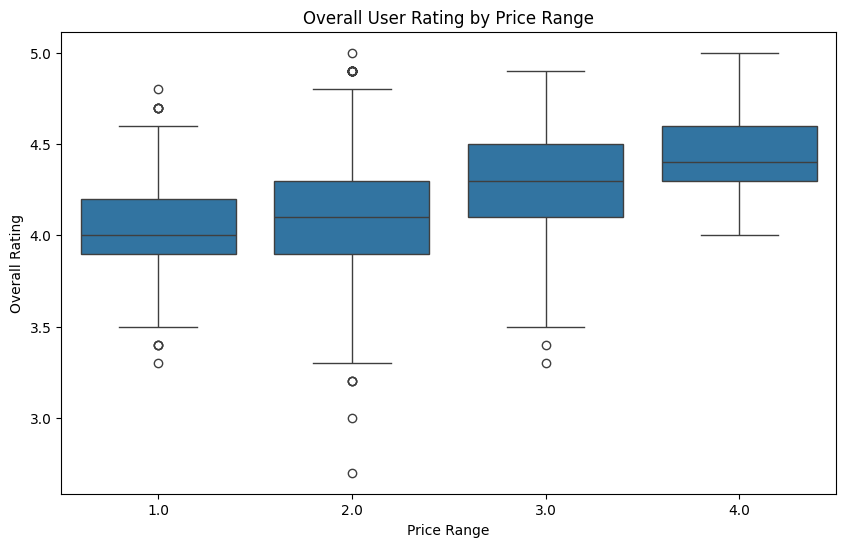

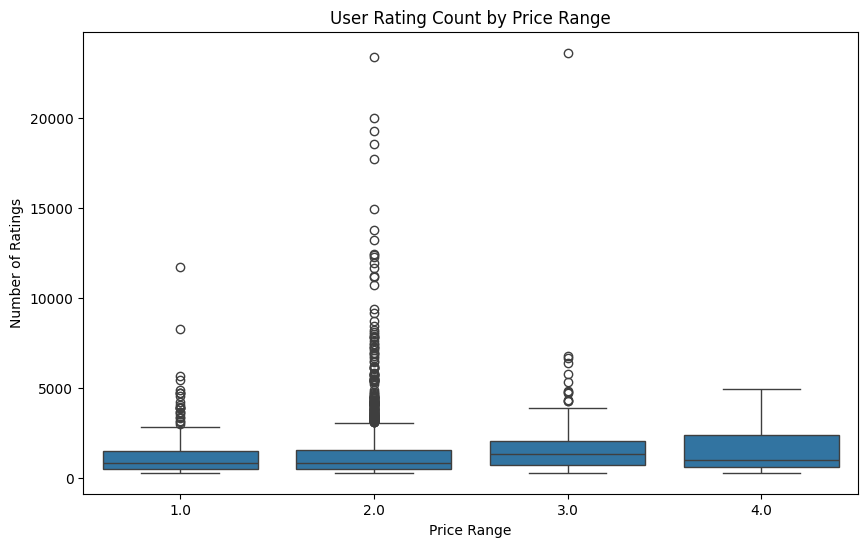

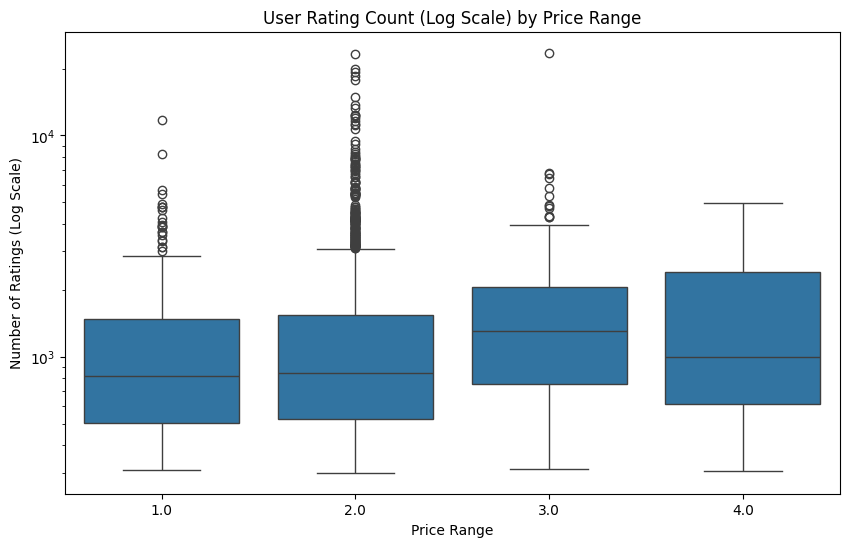

In [21]:
# ---  Create Box Plot for 'place_overall_rating' ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='priceRange', y='place_overall_rating', data=not_null_restaurant)
plt.title('Overall User Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Overall Rating')
plt.show()

# ---  Create Box Plot for 'userRatingCount' ---
# Note: This might look skewed, which is why we test!
plt.figure(figsize=(10, 6))
sns.boxplot(x='priceRange', y='userRatingCount', data=not_null_restaurant)
plt.title('User Rating Count by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Ratings')
plt.show() 

# For rating count, a log scale might be easier to see
plt.figure(figsize=(10, 6))
sns.boxplot(x='priceRange', y='userRatingCount', data=not_null_restaurant)
plt.yscale('log') # Set y-axis to log scale
plt.title('User Rating Count (Log Scale) by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Ratings (Log Scale)')
plt.show()

In [24]:
from scipy.stats import kruskal, f_oneway

# --- Prepare data for testing ---
# First, find out your unique price categories
price_categories = not_null_restaurant['priceRange'].unique()

# --- Test 1: Price Range vs. 'place_overall_rating' ---
# 'place_overall_rating' is often "normally distributed," so ANOVA is a good choice.
print("\n--- Test 1: ANOVA for 'place_overall_rating' ---")

# Create a list of rating arrays, one for each price category
rating_groups = []
for category in price_categories:
    ratings = not_null_restaurant[not_null_restaurant['priceRange'] == category]['place_overall_rating']
    rating_groups.append(ratings)

# Run the One-Way ANOVA
# The * separates the list into individual arguments
f_stat, p_value_anova = f_oneway(*rating_groups)

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value_anova:.4f}")

if p_value_anova < 0.05:
    print("Result: There IS a statistically significant difference in 'place_overall_rating' between price ranges.")
else:
    print("Result: There is NO statistically significant difference in 'place_overall_rating' between price ranges.")


# --- Test 2: Price Range vs. 'userRatingCount' ---
# 'userRatingCount' is likely NOT normal (it's count data).
# The Kruskal-Wallis H-test is a much safer and more robust choice.
print("\n--- Test 2: Kruskal-Wallis for 'userRatingCount' ---")

# Create a list of count arrays, one for each price category
count_groups = []
for category in price_categories:
    counts = not_null_restaurant[not_null_restaurant['priceRange'] == category]['userRatingCount']
    count_groups.append(counts)

# Run the Kruskal-Wallis H-test
h_stat, p_value_kruskal = kruskal(*count_groups)

print(f"Kruskal-Wallis H-statistic: {h_stat:.4f}")
print(f"Kruskal-Wallis p-value: {p_value_kruskal:.4f}")

if p_value_kruskal < 0.05:
    print("Result: There IS a statistically significant difference in 'userRatingCount' between price ranges.")
else:
    print("Result: There is NO statistically significant difference in 'userRatingCount' between price ranges.")


--- Test 1: ANOVA for 'place_overall_rating' ---
ANOVA F-statistic: 27.4153
ANOVA p-value: 0.0000
Result: There IS a statistically significant difference in 'place_overall_rating' between price ranges.

--- Test 2: Kruskal-Wallis for 'userRatingCount' ---
Kruskal-Wallis H-statistic: 28.8102
Kruskal-Wallis p-value: 0.0000
Result: There IS a statistically significant difference in 'userRatingCount' between price ranges.
